In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [7]:
twitchData = pd.read_csv("/Users/joanwaweru/Desktop/PyData Analysis/twitchStreamerAnalysis/twitchdata-update.csv")
twitchData.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [8]:
#check the shape of the dataset, in this case there are 1000 observations and 11 columns
twitchData.shape

(1000, 11)

In [9]:
#checks the information of each column and its type
twitchData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [10]:
#checks how many columns are in the dataset, in this case there are 11 of them
twitchData.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [11]:
#checks if there are any null values in the columns, in this case there are no null values
twitchData.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [12]:
#describing the dataset by calculating the mean, std, and different quartiles
twitchData.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


Explanatory Data Analysis

In [13]:
# I start by calculating the distribution of viewership (average number of viewers)
#import seaborn as sns

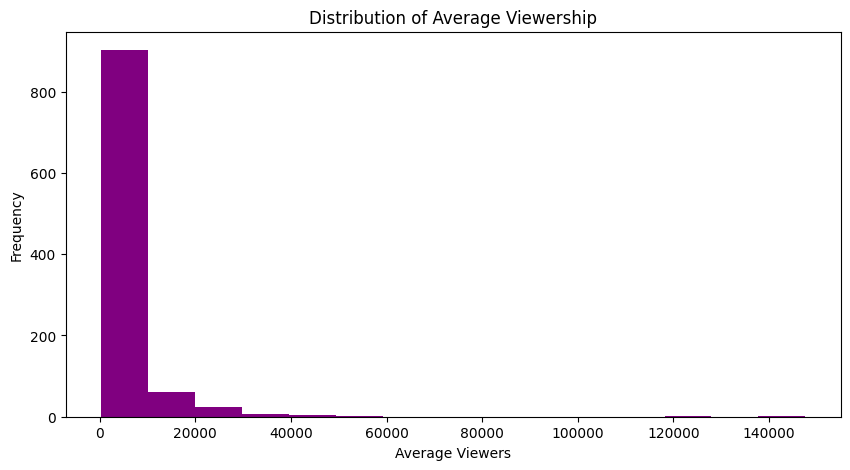

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(twitchData['Average viewers'], bins=15, alpha=1.0, color='purple')
plt.title('Distribution of Average Viewership')
plt.xlabel('Average Viewers')
plt.ylabel('Frequency')
plt.show()
# this shows that the average viewership is below 20,000 viewers and very few channels having 140,000 viewers

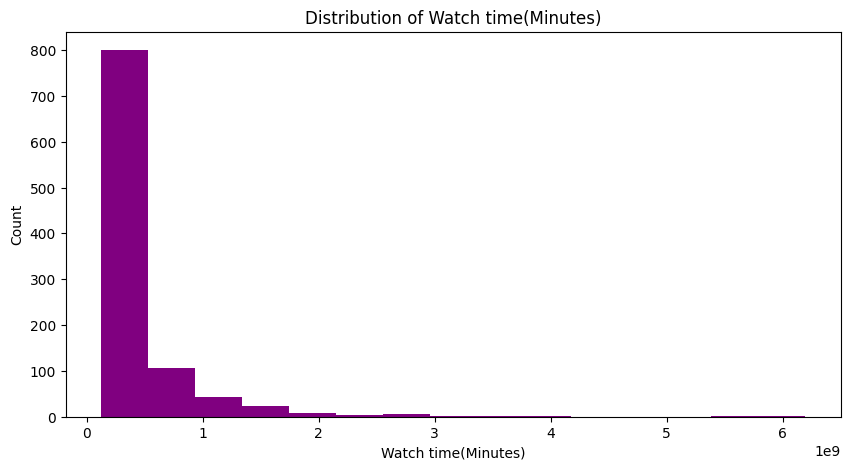

In [33]:
plt.figure(figsize=(10, 5))
plt.hist(twitchData['Watch time(Minutes)'], bins=15, alpha=1.0, color='purple')
plt.title('Distribution of Watch time(Minutes)')
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Count')
plt.show()

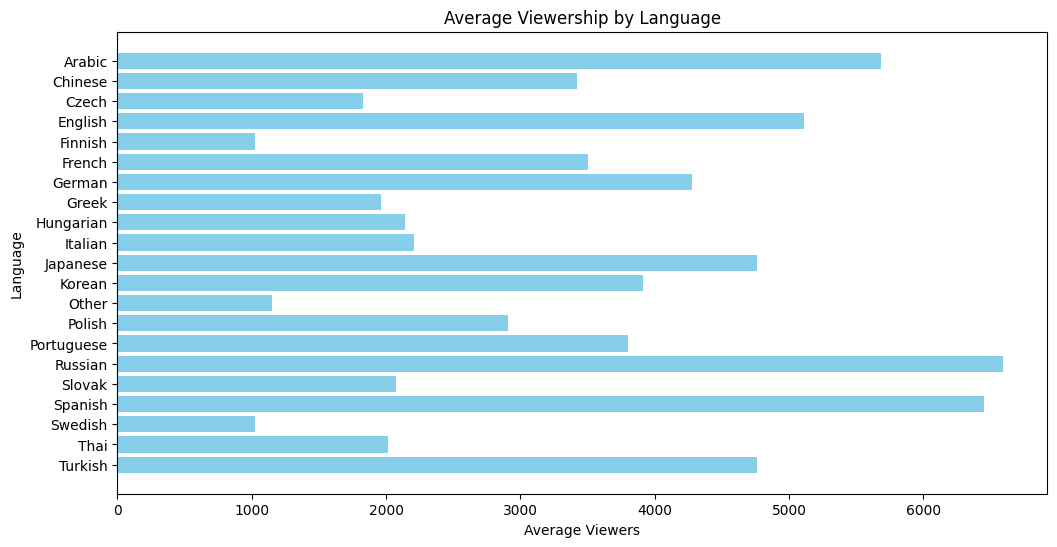

In [35]:
#Calculate the average viewership by language
average_viewers_by_language = twitchData.groupby('Language')['Average viewers'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(average_viewers_by_language['Language'], average_viewers_by_language['Average viewers'], color='skyblue')
plt.title('Average Viewership by Language')
plt.xlabel('Average Viewers')
plt.ylabel('Language')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest average viewership at the top
plt.show()
# from this, the language that is used the most by viewers the most is Russian, followed by Spanish then Arabic.